In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# 1.Data extraction

In [4]:
bike2017=pd.read_csv('2017.csv')
bike2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
bike2017.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [6]:
bike2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


# 2 Cleaning Process

At the beggining lets take a look at the duplicates and null values.

In [7]:
bike2017['start_time']=pd.to_datetime(bike2017['start_time'])
bike2017['end_time']=pd.to_datetime(bike2017['end_time'])

In [8]:
bike2017['start_time'].duplicated().value_counts()

False    519688
True         12
Name: start_time, dtype: int64

In [9]:
bike2017[bike2017['start_time'].duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
52592,474,2017-12-11 08:30:30.571,2017-12-11 08:38:25.257,23,The Embarcadero at Steuart St,37.791464,-122.391034,6,The Embarcadero at Sansome St,37.804770,-122.403234,71,Subscriber,1995.0,Male
64524,457,2017-12-07 09:09:04.420,2017-12-07 09:16:42.374,78,Folsom St at 9th St,37.773717,-122.411647,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,796,Customer,1983.0,Male
75395,227,2017-12-04 17:51:03.433,2017-12-04 17:54:51.354,8,The Embarcadero at Vallejo St,37.799953,-122.398525,16,Steuart St at Market St,37.794130,-122.394430,1353,Subscriber,1972.0,Female
116164,389,2017-11-20 17:28:29.373,2017-11-20 17:34:58.376,49,S Park St at 3rd St,37.780760,-122.394989,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3180,Subscriber,1972.0,Male
137006,306,2017-11-13 20:23:02.310,2017-11-13 20:28:09.227,152,47th St at San Pablo Ave,37.835632,-122.281051,149,Emeryville Town Hall,37.831275,-122.285633,794,Customer,1970.0,Male
247327,405,2017-10-13 09:25:36.776,2017-10-13 09:32:22.652,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,36,Folsom St at 3rd St,37.783830,-122.398870,224,Subscriber,1986.0,Male
270049,636,2017-10-06 13:22:43.024,2017-10-06 13:33:19.226,146,30th St at San Jose Ave,37.742314,-122.423180,123,Folsom St at 19th St,37.760594,-122.414817,2456,Customer,1982.0,Male
279531,534,2017-10-04 09:03:00.607,2017-10-04 09:11:54.818,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,182,19th Street BART Station,37.809013,-122.268247,3107,Customer,1984.0,Male
304501,370,2017-09-27 09:08:34.218,2017-09-27 09:14:44.603,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,45,5th St at Howard St,37.781752,-122.405127,3065,Subscriber,1990.0,Male
311959,484,2017-09-25 09:53:17.311,2017-09-25 10:01:21.884,109,17th St at Valencia St,37.763316,-122.421904,58,Market St at 10th St,37.776619,-122.417385,2411,Subscriber,1971.0,Male


In [10]:
bike2017[bike2017.duplicated(subset=['end_time'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
30801,501,2017-12-16 17:56:57.409,2017-12-16 18:05:18.746,305,Ryland Park,37.342725,-121.895617,280,San Fernando at 7th St,37.337246,-121.883074,1388,Subscriber,1988.0,Male
84971,814,2017-12-01 11:14:14.152,2017-12-01 11:27:48.583,78,Folsom St at 9th St,37.773717,-122.411647,66,3rd St at Townsend St,37.778742,-122.392741,2926,Subscriber,1986.0,Female
98914,593,2017-11-28 07:52:45.739,2017-11-28 08:02:38.854,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64,5th St at Brannan St,37.776754,-122.399018,1159,Subscriber,1995.0,Male
129641,388,2017-11-15 17:47:41.724,2017-11-15 17:54:10.340,25,Howard St at 2nd St,37.787522,-122.397405,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,437,Subscriber,1982.0,Male
135805,1156,2017-11-14 08:39:39.580,2017-11-14 08:58:56.447,39,Scott St at Golden Gate Ave,37.778999,-122.436861,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2072,Subscriber,1985.0,Male
160082,990,2017-11-07 09:36:45.214,2017-11-07 09:53:15.215,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3001,Subscriber,1985.0,Male
181781,553,2017-11-01 07:55:20.948,2017-11-01 08:04:34.077,189,Genoa St at 55th St,37.839649,-122.271756,176,MacArthur BART Station,37.828410,-122.266315,2705,Subscriber,1981.0,Female
195509,721,2017-10-27 17:20:12.473,2017-10-27 17:32:13.649,145,29th St at Church St,37.743684,-122.426806,99,Folsom St at 15th St,37.767037,-122.415443,906,Subscriber,1964.0,Female
208177,123,2017-10-24 19:03:04.384,2017-10-24 19:05:08.092,115,Jackson Playground,37.765026,-122.398773,114,Rhode Island St at 17th St,37.764478,-122.402570,688,Subscriber,1984.0,Female
266799,345,2017-10-07 13:57:43.356,2017-10-07 14:03:29.193,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,197,El Embarcadero at Grand Ave,37.808848,-122.249680,1451,Customer,1992.0,Female


Taking a look at the start and end time duplicates we can see that they are totaly different rides. We dont hace to take any 
action. 

### Null values


In [11]:
nu=bike2017[bike2017['member_gender'].isnull()]
nu['user_type'].value_counts()


Customer      61735
Subscriber     4727
Name: user_type, dtype: int64

We can see that the majority of the  NaN values at 'user type' and 'gender' columns are at customers rides. 
I dont want to drop those rows because i need the customers data. 

### Quality and tidness issues

1. I will make a column caled  'Customer_age' in ordere to make the data more user friendly.
2. I will transform the ride duration fron seconds to minutes.
3. I will make a new categorical column named 'general_runtime', seperating the ride duration at 'casual' and 'long' rides.
4. I will make a new categorical column named 'Customer_age' , seperating the ages by decate.
5. I will separete the start_date and 3 months. "hour_start", 'day_start','month_start' to help our analysis. 



## 1.

In [12]:
bike2017['Customer_age']=2019-bike2017['member_birth_year']
bike2017=bike2017.drop('member_birth_year',axis=1)

## 2.

In [13]:
bike2017['duration_sec']=bike2017['duration_sec']/60
bike2017=bike2017.rename(columns={'duration_sec':'duration_min'})

## 3.

In [14]:
bin_edges=[bike2017['duration_min'].min(),bike2017['duration_min'].mean(),bike2017['duration_min'].max()]
bin_names=['casual','long']
bike2017['general_runtime']=pd.cut(bike2017['duration_min'],bin_edges,labels=bin_names)

## 4.

In [15]:
bin_edges=[20.000000,30,40,50,60,70,140]
bin_names=['20s','30s','40s','50s','60s','>70']
bike2017['Customer_decade']=pd.cut(bike2017['Customer_age'],bin_edges,labels=bin_names)

## 5.

In [16]:
bike2017['hour_start']=bike2017['start_time'].dt.hour

In [17]:
bike2017['day_start']=bike2017['start_time'].dt.weekday_name

In [18]:
bike2017['month_start']=bike2017['start_time'].dt.month

In [19]:
bike2017=bike2017.drop('start_time',axis=1)
bike2017=bike2017.drop('end_time',axis=1)

## Test

In [20]:
bike2017.head()

,duration_min,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,Customer_age,general_runtime,Customer_decade,hour_start,day_start,month_start
0,1335.166667,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Male,32.0,long,30s,16,Sunday,12
1,1313.333333,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Female,54.0,long,50s,15,Sunday,12
2,762.800000,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,long,NaN,22,Sunday,12
3,1036.200000,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,long,NaN,17,Sunday,12
4,726.716667,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Female,22.0,long,20s,14,Sunday,12


In [21]:
bike2017['Customer_age'].fillna(value=bike2017.Customer_age.mean(),inplace=True)

In [22]:
bike2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
duration_min               519700 non-null float64
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_gender              453238 non-null object
Customer_age               519700 non-null float64
general_runtime            519642 non-null category
Customer_decade            452260 non-null category
hour_start                 519700 non-null int64
day_start                  519700 non-null object
month_start                519700

In [23]:
bike2017.to_csv('clean_bikes.csv')

# 3 Exploratory analysis

In [24]:
bike2017=pd.read_csv('clean_bikes.csv')

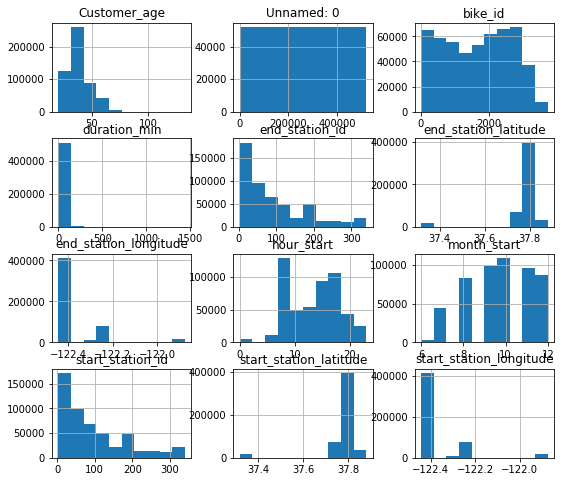

In [25]:
bike2017.hist(figsize=(9,8));

In [26]:
bike2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
Unnamed: 0                 519700 non-null int64
duration_min               519700 non-null float64
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_gender              453238 non-null object
Customer_age               519700 non-null float64
general_runtime            519642 non-null object
Customer_decade            452260 non-null object
hour_start                 519700 non-null int64
day_start                  519700 non-

## The structure of the dataset
There are 519700 bike rides in the dataset with 19 features . Most variables are categorical.

## The main features of interest in my dataset.

I'm most interested in figuring out how does every different biker group (gender, age, custormer-subscriber) behave and how the bike use change through time.

I'll start by looking at the distribution of the main variable of interest: duration

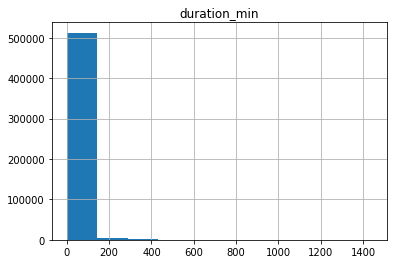

In [27]:
bike2017.hist(['duration_min']);

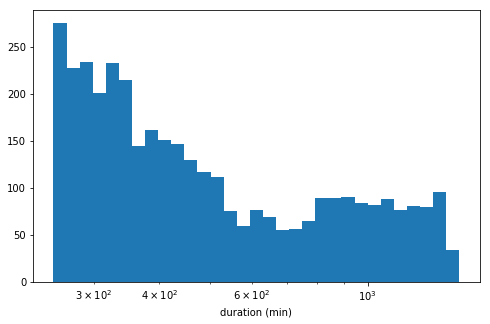

In [28]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(bike2017['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike2017, x = 'duration_min', bins = bins)
plt.xscale('log')

plt.xlabel('duration (min)')
plt.show()

Duration has a long-tailed distribution, with a lot of rides on the short duration end, and few on the long duration end. When plotted on a log-scale, the duration distribution keeps the same shape.

I want to check the duration distribution for the shortest rides

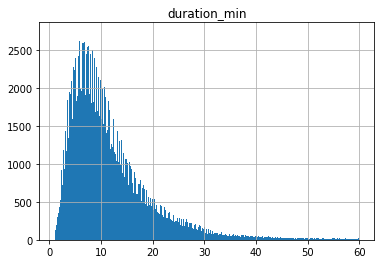

In [29]:
a=bike2017[bike2017['duration_min']<60]
a.hist(['duration_min'],bins = 1000);

We can see that the majority of the rides are between 3-5 mins

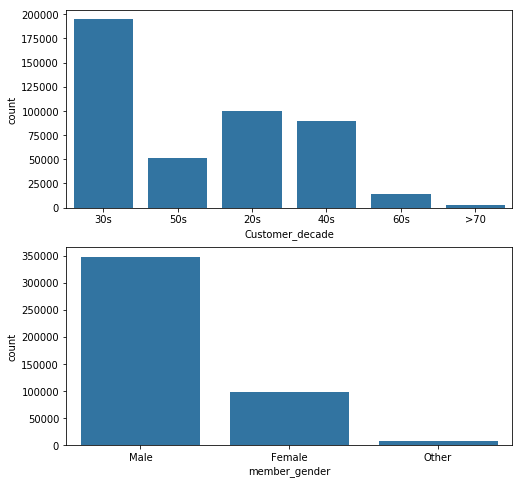

In [30]:
# let's plot all some categorical variables together to get an idea of each  variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bike2017, x = 'Customer_decade', color = default_color, ax = ax[0])
sb.countplot(data = bike2017, x = 'member_gender', color = default_color, ax = ax[1])

plt.show()

The bikers are generaly young with the majority in their 20s-30s. Additionaly the majority are men.

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


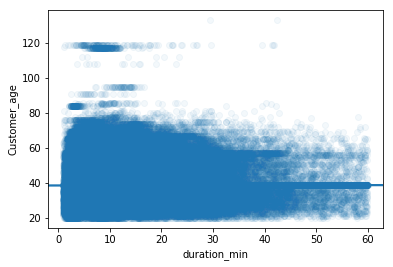

In [31]:
sb.regplot(data=a, x='duration_min',y='Customer_age',scatter_kws={'alpha': 1/20})

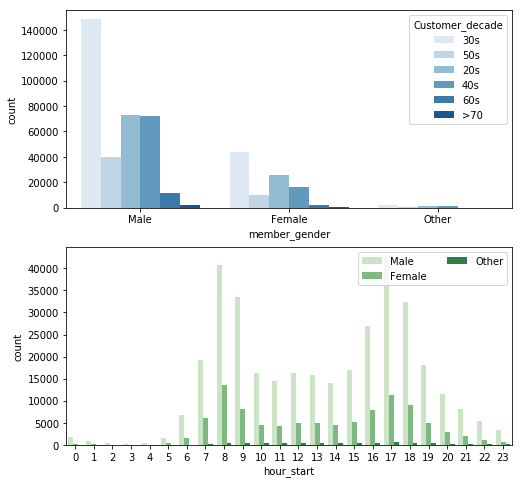

In [32]:
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(2, 1, 1)
sb.countplot(data = bike2017, x = 'member_gender', hue = 'Customer_decade', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(2, 1, 2)
sb.countplot(data = bike2017, x = 'hour_start', hue = 'member_gender', palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping



plt.show()

We can see that olny for the women the 40s decade is lower than 20s. It means that the women over 40 years old do ntt prefer the bikes. The hour diagram doesnt show something different for the genders. They all follow the same movement through the day.

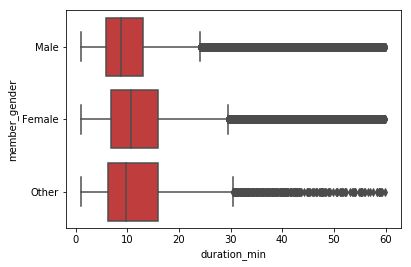

In [33]:
a=bike2017[bike2017['duration_min']<60]
base_color = sb.color_palette()[3]
sb.boxplot(data = a, x='duration_min', y='member_gender', color = base_color);

What is intresting is that the Females have the biggest duration mean on their rides. At the other side, men taking the shortest rides. 

Lets see the same diagramm only for the younger riders.

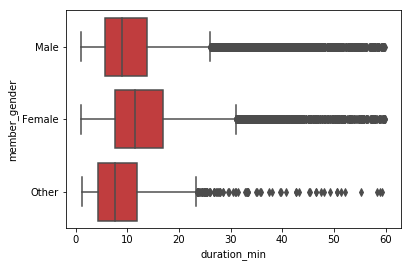

In [34]:
y=a[a['Customer_age']<30]
base_color = sb.color_palette()[3]
sb.boxplot(data = y, x='duration_min', y='member_gender', color = base_color);

Here the differences between the genders are bigger. At the 'under 30s age' the Other gender take the shortest rides

We can see the same thing below:

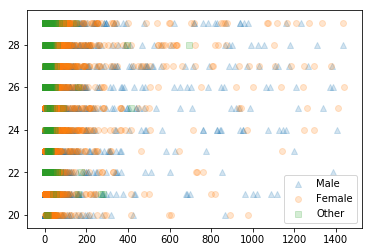

In [35]:
young=bike2017[bike2017['Customer_age']<30]

gender = [['Male', '^'],['Female','o'],
               ['Other', 's']]

for gen, marker in gender:
    df_gender = young[young['member_gender'] == gen]
    plt.scatter(data = df_gender, x = 'duration_min', y = 'Customer_age',
                marker = marker,alpha = 1/5)
    
plt.legend(['Male','Female','Other']);

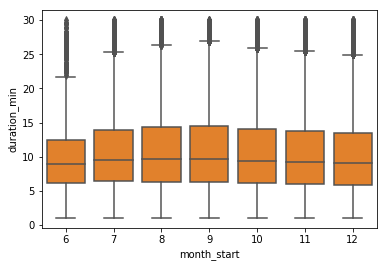

In [36]:
a=bike2017[bike2017['duration_min']<30]
base_color = sb.color_palette()[1]
sb.boxplot(data = a, x='month_start', y='duration_min', color = base_color);

In [37]:
mcount=bike2017.groupby('month_start').size()
mcount = mcount.reset_index(name = 'count')

mcount

,month_start,count
0,6,2689
1,7,44073
2,8,83292
3,9,98558
4,10,108937
5,11,95612
6,12,86539


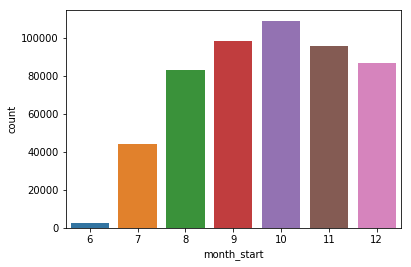

In [38]:
sb.barplot(data = mcount, x = 'month_start',y='count');

We can see that the summer months have the longest rides and the October have the more rides.

In [39]:
bike2017['duration_min'].describe(),bike2017['Customer_age'].describe()

(count    519700.000000
 mean         18.316825
 std          57.402441
 min           1.016667
 25%           6.366667
 50%           9.933333
 75%          15.633333
 max        1439.483333
 Name: duration_min, dtype: float64, count    519700.000000
 mean         38.595213
 std           9.817382
 min          20.000000
 25%          32.000000
 50%          38.000000
 75%          43.000000
 max         133.000000
 Name: Customer_age, dtype: float64)

In [40]:
ccounts=bike2017.groupby(['member_gender','Customer_decade']).size()
ccounts = ccounts.reset_index(name = 'count')
ccounts = ccounts.pivot(index = 'Customer_decade', columns = 'member_gender', values = 'count')

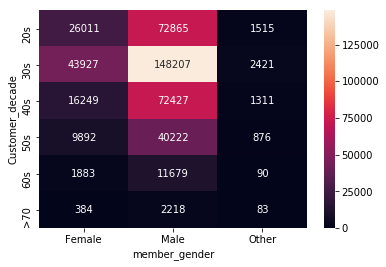

In [41]:
sb.heatmap(ccounts,annot = True, fmt = 'd')

The biggest group is "Male riders at their 30s" and the smallest is "Other riders older than 70 years old"

In [42]:
dcounts=bike2017.groupby(['month_start','day_start']).size()
dcounts = dcounts.reset_index(name = 'count')
dcounts = dcounts.pivot(index = 'day_start', columns = 'month_start', values = 'count')

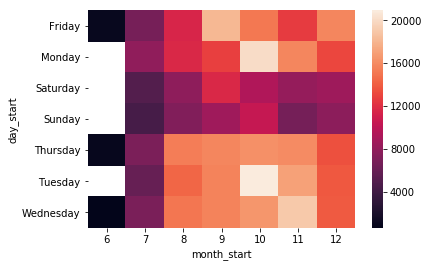

In [43]:
sb.heatmap(dcounts)

The most crowded days where the Thuesdays and Mondays of October.

In [44]:
hcounts=bike2017.groupby(['day_start','hour_start']).size()
hcounts = hcounts.reset_index(name = 'count')
hcounts = hcounts.pivot(index = 'hour_start', columns = 'day_start', values = 'count')

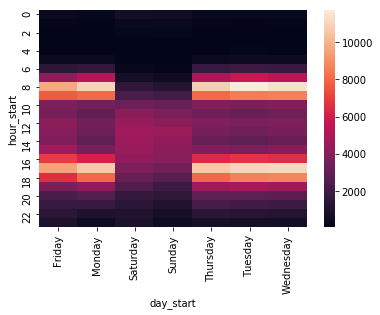

In [45]:
sb.heatmap(hcounts)

We can see that the more rides are on working days at 8:00 and 16:00-17:00. This can lead us to the conclusion that the riders are using their bikes to go to work.  

In [46]:
start=bike2017.groupby('start_station_name').size().sort_values().tail()
start

start_station_name
Market St at 10th St                                         11960
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
San Francisco Caltrain (Townsend St at 4th St)               12546
The Embarcadero at Sansome St                                13664
San Francisco Ferry Building (Harry Bridges Plaza)           15187
dtype: int64

In [47]:
bike2017.groupby('end_station_name').size().sort_values().tail()

end_station_name
Montgomery St BART Station (Market St at 2nd St)             13443
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
The Embarcadero at Sansome St                                16531
San Francisco Ferry Building (Harry Bridges Plaza)           17109
San Francisco Caltrain (Townsend St at 4th St)               17378
dtype: int64